## Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
df = pd.read_csv("./archive.zip")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Checking Null values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### From the above information we can observe that Age age, fare and Cabin contain null values

# Data Cleaning
###### Drop unrelevant Columns
        

In [8]:
df=df.drop(['Cabin'], axis=1)
df=df.drop(['Fare'], axis=1)

## Updates Dataset


In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,S


In [10]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Embarked        0
dtype: int64

## Filling the null values in age columns

In [11]:
gen_age=np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std(), size=86)

In [12]:
df['Age'][np.isnan(df['Age'])]=gen_age

C:\Users\ABHIJEET_KUMAR\AppData\Local\Temp\ipykernel_7204\2494542157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][np.isnan(df['Age'])]=gen_age


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

### Now we can see that there is no null values in our dataset

### Operations on Dataset

In [14]:
df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,1.0
male,0.0


In [15]:
df[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.392157
Q,0.521739
S,0.325926


## Data Visulisation

C:\Users\ABHIJEET_KUMAR\AppData\Local\Temp\ipykernel_7204\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

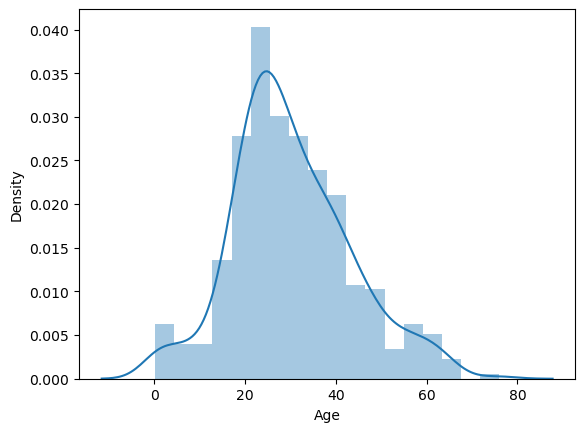

In [16]:
sns.distplot(df['Age'])

<Axes: >

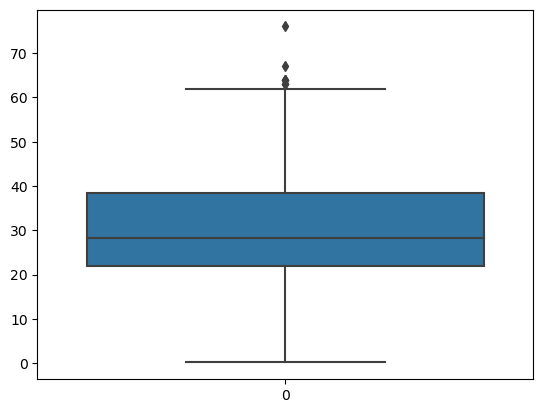

In [17]:
sns.boxplot(df['Age'])

In [18]:
df[df['Age']>75]['Survived'].value_counts()

1    1
Name: Survived, dtype: int64

C:\Users\ABHIJEET_KUMAR\AppData\Local\Temp\ipykernel_7204\815830472.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\ABHIJEET_KUMAR\AppData\Local\Temp\ipykernel_7204\815830472.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age

<Axes: xlabel='Age', ylabel='Density'>

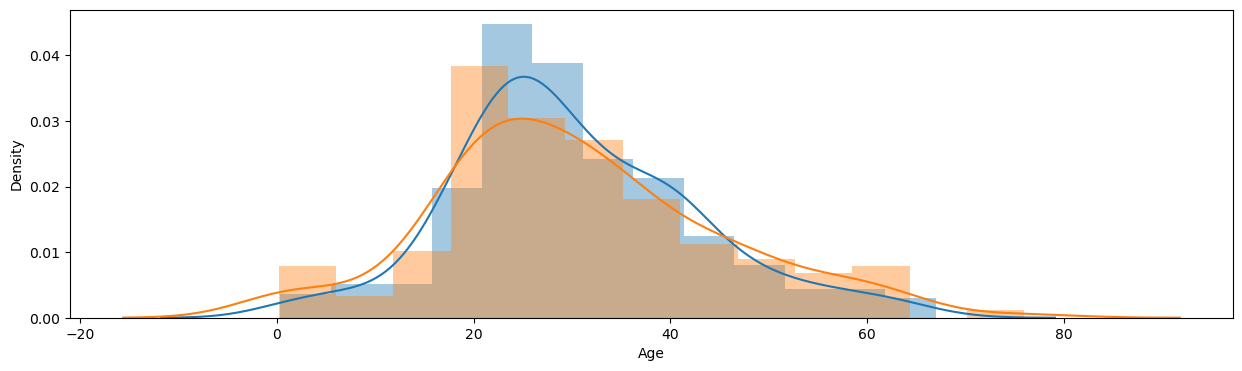

In [19]:
plt.subplots(figsize=(15,4))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\ABHIJEET_KUMAR\AppData\Local\Temp\ipykernel_7204\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

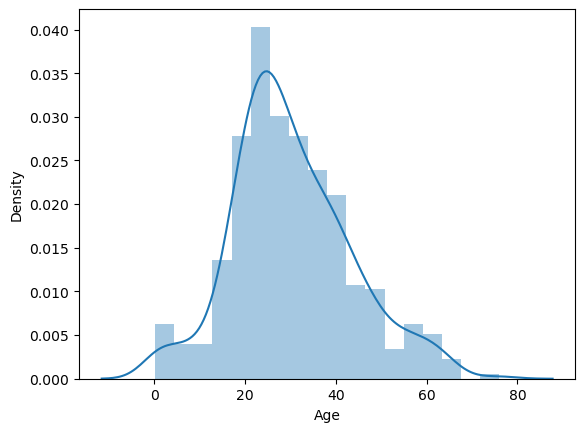

In [20]:
sns.distplot(df['Age'])

<Axes: >

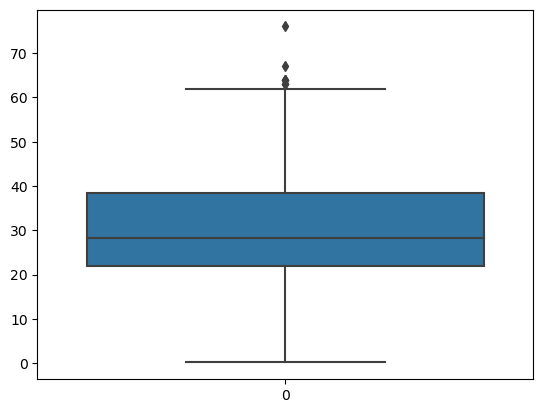

In [21]:
sns.boxplot(df['Age'])

In [22]:
df[df['Age']>40]['Survived'].value_counts()

0    52
1    33
Name: Survived, dtype: int64

C:\Users\ABHIJEET_KUMAR\AppData\Local\Temp\ipykernel_7204\2472981692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\ABHIJEET_KUMAR\AppData\Local\Temp\ipykernel_7204\2472981692.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['A

<Axes: xlabel='Age', ylabel='Density'>

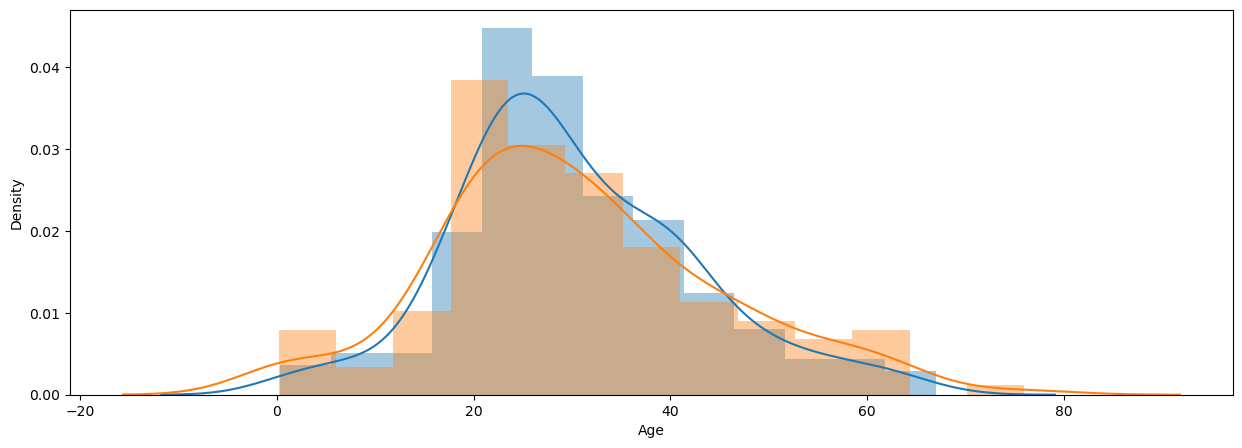

In [23]:
plt.subplots(figsize=(15,5))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])


In [24]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

### let's visualize the count of survivals wrt pclass


<Axes: xlabel='Survived', ylabel='count'>

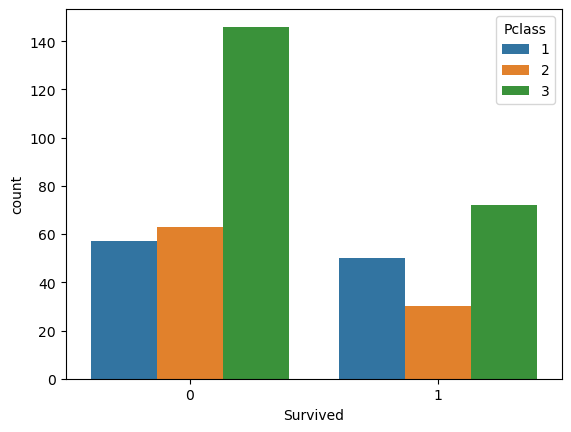

In [25]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])

In [26]:
df["Sex"]

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

### let's visualize the count of survivals wrt Gender


<Axes: xlabel='Sex', ylabel='count'>

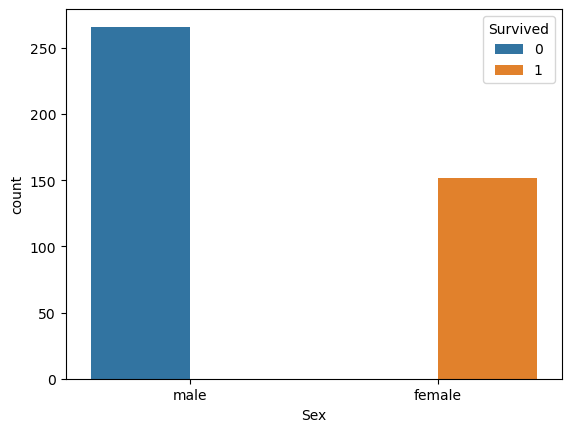

In [27]:
sns.countplot(x=df['Sex'], hue=df['Survived'])

### Look at survival rate by sex


In [28]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [29]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex']= labelencoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,S


In [31]:
df['Sex'], df['Survived']

(0      1
 1      0
 2      1
 3      1
 4      0
       ..
 413    1
 414    0
 415    1
 416    1
 417    1
 Name: Sex, Length: 418, dtype: int32,
 0      0
 1      1
 2      0
 3      0
 4      1
       ..
 413    0
 414    1
 415    0
 416    0
 417    0
 Name: Survived, Length: 418, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

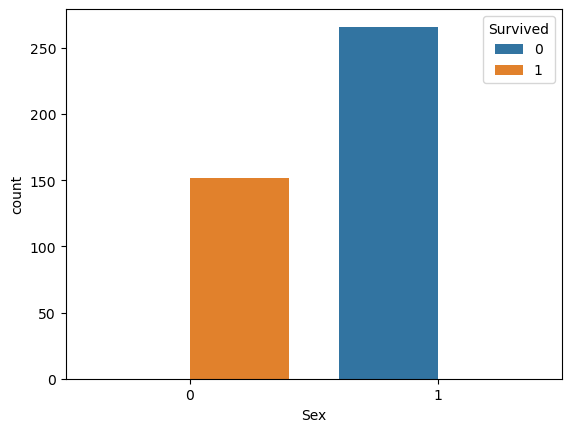

In [32]:
sns.countplot(x=df['Sex'], hue=df["Survived"])

In [34]:
df_final = df
df_final.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,S
5,897,0,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,S
6,898,1,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,C
9,901,0,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,S


In [35]:
X= df[['Pclass', 'Sex']]
Y=df['Survived']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [37]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [38]:
pred = print(log.predict(X_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [39]:
print(Y_test)

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64


In [40]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[2,1]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

So Sorry! Not Survived
